# Communitcate Data Insight Baywheels Part 2/2
## by Paul Dzitse

## 1. Investigation Overview

This Capstone projectis part of the Udacity Data Analysis Nanodegree course. It focuses on the importance and value of data visualization techniques in the data analysis process and has two parts. 

In the first part (1/2),  I used Python visualization libraries to systematically wrangle and explore the 2019-fordgobike-tripdata (Baywheels-tripdata) dataset. I started with plots of single variables and building up to explore plots of multiple variables.

The second part of the project (2/2), I present some interesting relationships, patterns and insights that I uncovered in the Part 1 analysis. 

## 2. Dataset Overview

For this analysis, I used dataset that consists of information on 2.506.983 bike trips, thus including its timing and geolocation of the start and end of each trip. The datasets were gather for each month in 2019. So for the analysis I have combined into one dataset. The dataset is 2019-baywheels-tripdata.csv. 

My focus is to uncover the some pattern of biketrip distribution and the characteristics of two user-tpyes (Customers and Subscribers) in terms of biketrips. Given this, important variables are listed below

- user_type (Subscriber or Customer)
- duration_min (duration of trip in minutes)
- start_date (date of start of biketrip)
- start_hour_of_day (hour of start of biketrip)
- start_day_of_week (day of week in which a biketrip occured)
- start_month (month in which a biketrip occured)

#### Data Work: The data was cleaned by transforming some variables into their correct variable type and also outliers were removed using 5 standard deviation based on calculated Z-score. So, the selected dataset was based on trip duration less that 43 minutes. In addition I created some variables different time-resolutions (start_hour, start-day-of-week, start_month)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Reading in the 13 datasets which cover the 12 months of the year 2019.
files = ['\dataset\201901-baywheels-tripdata.csv',
              '\dataset\201902-baywheels-tripdata.csv',
              '\dataset\201903-baywheels-tripdata.csv',
              '\dataset\201904-baywheels-tripdata.csv',
              '\dataset\201905-baywheels-tripdata.csv',
              '\dataset\201906-baywheels-tripdata.csv',
              '\dataset\201907-baywheels-tripdata.csv',
              '\dataset\201908-baywheels-tripdata.csv',
              '\dataset\201909-baywheels-tripdata.csv',
              '\dataset\201910-baywheels-tripdata.csv',
              '\dataset\201911-baywheels-tripdata.csv',
               '\dataset\201912-baywheels-tripdata.csv']

In [3]:
baywheels = pd.concat([pd.read_csv(f, usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12]) for f in glob.glob("dataset" + "/*.csv")], ignore_index=True)

baywheels_clean = baywheels.copy()


In [4]:
baywheels_clean['start_time'] = pd.to_datetime(baywheels_clean['start_time'])
baywheels_clean['end_time'] = pd.to_datetime(baywheels_clean['end_time'])
baywheels_clean['user_type'] = baywheels_clean['user_type'].astype('category')
baywheels_clean['duration_min'] = baywheels_clean['duration_sec']/60

In [5]:
# extract day,week,month from the start_time
baywheels_clean['start_date'] = baywheels_clean.start_time.dt.strftime('%Y-%m-%d')
baywheels_clean['start_hour_of_day'] = baywheels_clean.start_time.dt.strftime('%H')
baywheels_clean['start_day_of_week'] = baywheels_clean.start_time.dt.strftime('%A')
baywheels_clean['start_month'] = baywheels_clean.start_time.dt.strftime('%b')
baywheels_clean['year_month'] = baywheels_clean['start_time'].dt.to_period('M')

In [6]:
quartiles = np.percentile(baywheels_clean['duration_min'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig


6.5120000000000005

In [7]:
baywheels_new = baywheels_clean.query('(duration_min > @mu - 5 * @sig) & (duration_min < @mu + 5 * @sig)')

## Data key insights

## 3. 1: users-types distribution

#### user-types

- user-types are customers and Subscribers
- more than 80% of the data comprise Subscribers


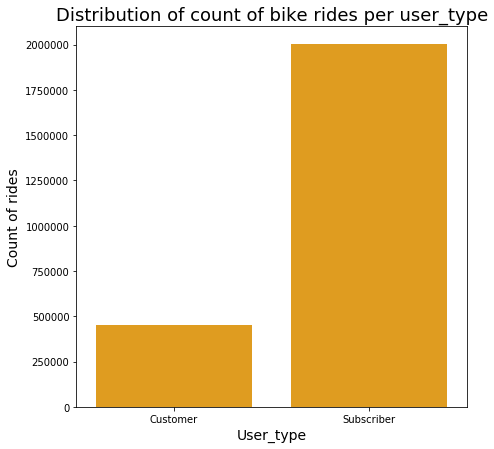

In [8]:
# same distribution in countplot format
plt.figure(figsize=(7,7))


sb.countplot(data=baywheels_new, x='user_type', color='orange')
plt.xlabel('User_type', fontsize=14)
plt.ylabel('Count of rides', fontsize=14)
plt.title('Distribution of count of bike rides per user_type', fontsize=18);

## 3.2 User-type distribution: 

#### Orientation: user_type-trip duration

-  customer have on average 5 minutes longer trip duration as Subscribers (bargraph)
-  third quartile of the Subscribers trip duration is just a little above the median of the Customers bike trip distribution 


Text(0.5, 1.0, 'boxplot')

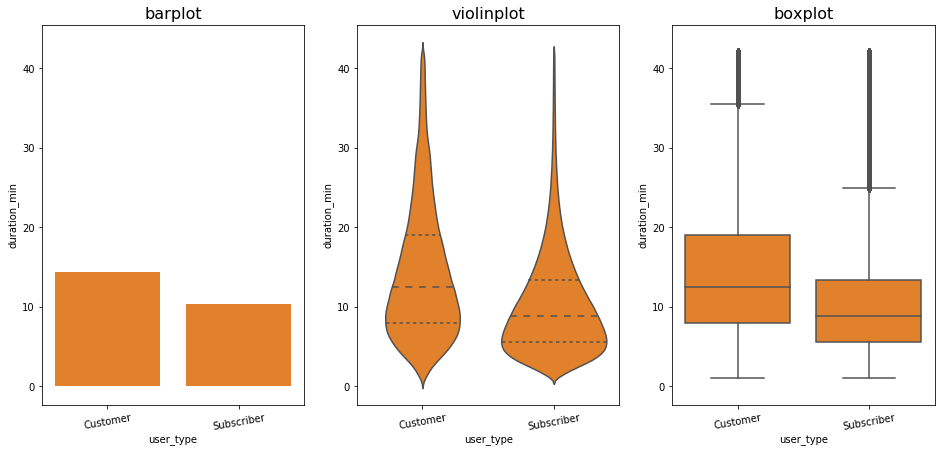

In [9]:
plt.figure(figsize = [16,7])
base_color = sb.color_palette()[1]
# mid plot: violinplot
plt.subplot(1, 3, 2)
ax1 = sb.violinplot(data = baywheels_new, x = 'user_type', y = 'duration_min', inner='quartile', color=base_color)
plt.xticks(rotation = 10)   
plt.title('violinplot', fontsize=16)         


plt.subplot(1, 3, 1)
sb.barplot(data = baywheels_new, x = 'user_type', y = 'duration_min', color=base_color)
plt.xticks(rotation = 10) 
plt.ylim(ax1.get_ylim())
plt.title('barplot', fontsize=16)  

plt.subplot(1, 3, 3)
sb.boxplot(data = baywheels_new, x = 'user_type', y = 'duration_min', color=base_color)
plt.xticks(rotation = 10) 
plt.ylim(ax1.get_ylim())
plt.title('boxplot', fontsize=16)         




## 3.3. User_type monthly bike trips distribution 

#### orientation: user_tpye, trip duration, month

- customers monthly bike trip duration is not stable
- Subscribers bike trip duration is stable
- distribution of Subscribers trip duration is more skewed to the right

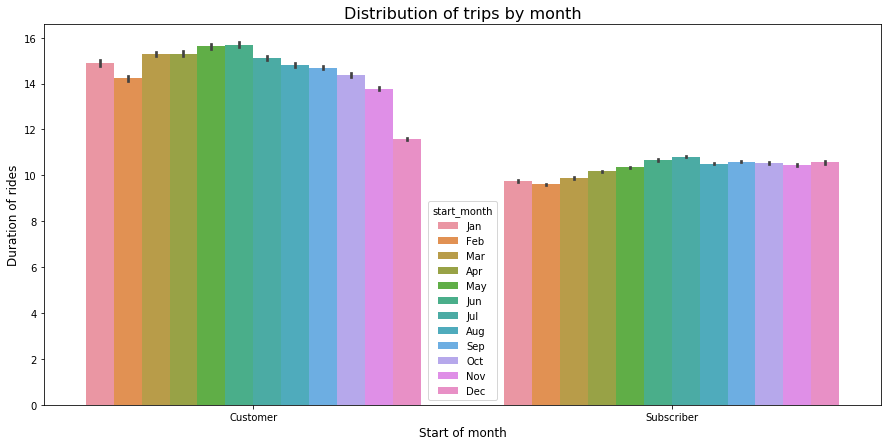

In [10]:
plt.figure(figsize=(15,7))
base_color = sb.color_palette()[2]

months_list = ['Jan','Feb','Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=months_list)
baywheels_new['start_month'] = baywheels_new['start_month'].astype(monthcat)

sb.barplot(data=baywheels_new, x='user_type', y='duration_min', hue='start_month');

plt.xlabel('Start of month', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by month", fontsize=16);

## 3.4. User_type bike trips distribution 
#### orientation: user_tpye, per hour-of-day and day-of-week

- Customers tend to use the bike services mostly at weekdays from 07:00 to 09:00 and 16:00 to 19:00 with heavy
  traffic at 08.00 and 17:00
- Customers use make bike trips on weekends between 10:00 and 16:00 GMT
- Subscribers use bikes only on weekdays between 05:00 and 09:00 as well as 15:00 to 19:00 hours with heavy traffic at 08:00 and 17:00 hours accordingly



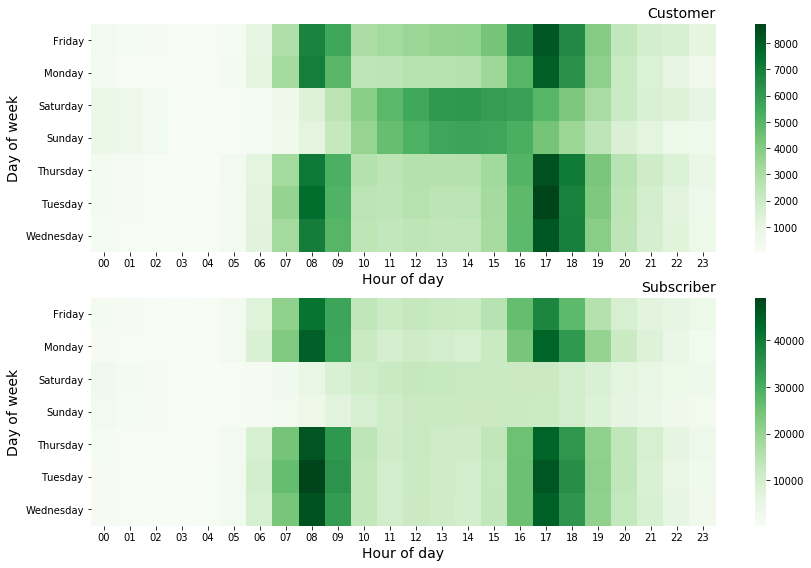

In [11]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = baywheels_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Greens");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = baywheels_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Greens");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)

### 3.5. 10 longest trip duration destination inline with end_station_name along within start_day_of_week:
#### orientationn: end_station, trip duration and days of the week


- The end destination of a bike trip is important for predicting bike usage and trip duration.
- The Embarcadero at Sansome St has the longesgt trip duration (about 30-40% higher) compared with other             destinations.
- station's near to great tourist/recreation centers might be a contributing factors 

In [12]:
# top 10 destinations:
popular_destinations = baywheels_new['end_station_name'].value_counts().index[:10]
# here we create dataframe with trips only to top 10 destinations
popular_destinations_df = baywheels_new.loc[baywheels_new['end_station_name'].isin(popular_destinations)]


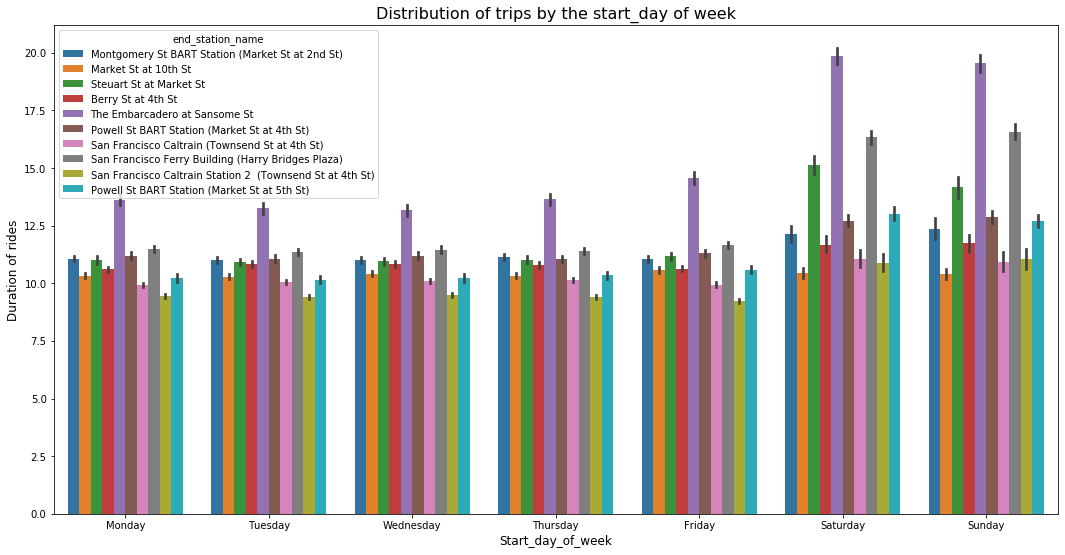

In [13]:
plt.figure(figsize=(18,9))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
popular_destinations_df['start_day_of_week'] = popular_destinations_df['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=popular_destinations_df, x='start_day_of_week', y='duration_min', hue='end_station_name')
plt.xlabel('Start_day_of_week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

### Map of Sansome St & The Embarcadero location

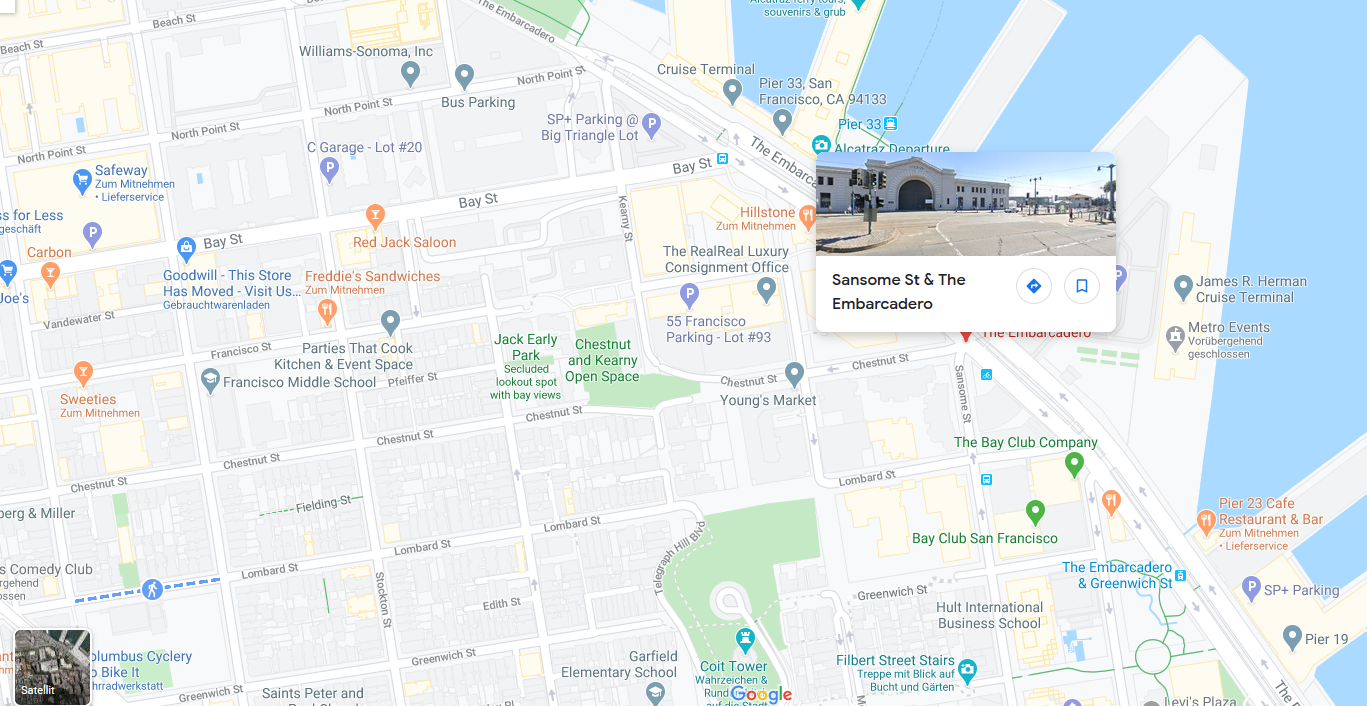

In [14]:
from IPython.display import Image
Image(filename='embarcadero.png')